In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=5.862951741266791 et b_1=5.362553541139286


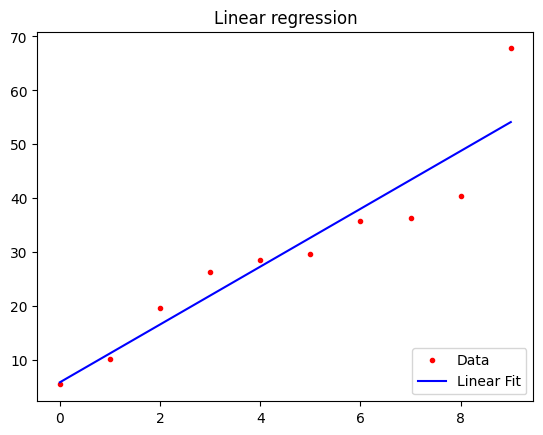

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [7]:
lr = LinearRegression()

print("Considering the outlier:")
for _ in range(5):
    x, y = generate_data(n_samples=10, outlier=True)
    x = x.reshape(-1,1)

    lr.fit(x, y)
    y_pred = lr.predict(x)

    print(f'\tb_0={lr.intercept_}, b_1={lr.coef_[0]} et s2={s2(y, y_pred)}')

print("\n\nWithout the outlier:")
for _ in range(5):
    x, y = generate_data(n_samples=10, outlier=False)
    x = x.reshape(-1,1)

    lr.fit(x, y)
    y_pred = lr.predict(x)

    print(f'\tb_0={lr.intercept_}, b_1={lr.coef_[0]} et s2={s2(y, y_pred)}')

Considering the outlier:
	b_0=6.422109561866538, b_1=5.14377990675093 et s2=42.34590759551539
	b_0=6.305241426170223, b_1=4.944527074700268 et s2=38.52786422684181
	b_0=3.934839345512355, b_1=5.73812847701817 et s2=36.687057614912696
	b_0=8.424186210305475, b_1=4.9646566545410895 et s2=44.87031578077302
	b_0=5.364771439531616, b_1=5.424362188043552 et s2=32.293241305260246


Without the outlier:
	b_0=9.973220306779215, b_1=3.9699321403581593 et s2=5.180023419668097
	b_0=11.308106336013427, b_1=3.873341700258564 et s2=3.374932818302935
	b_0=11.859568972683498, b_1=3.643586905578692 et s2=10.378957278171303
	b_0=12.662186799346411, b_1=3.559611109211705 et s2=4.901695117374089
	b_0=9.42910451953248, b_1=3.7835202745554186 et s2=12.336294240630629


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  $\hat{y_{(i)j}}$ est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des $e_{(i)j}$ est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser `x_del_i=np.delete(x,i)` et `y_del_i=np.delete(y,i)` 


In [8]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [9]:
def profil_residuel(x, y, i):
    x_del_i=np.delete(x,i)
    x_del_i = x_del_i.reshape(-1,1)
    y_del_i=np.delete(y,i)

    lr = LinearRegression()
    lr.fit(x_del_i, y_del_i)
    
    return y_del_i - lr.predict(x_del_i)

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

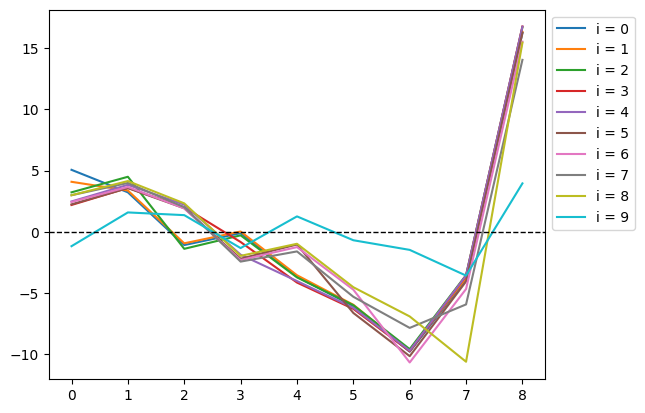

In [17]:
for i in range(10):
    plt.plot(profil_residuel(x,y,i), label=f'i = {i}')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [24]:
def cook(x, y, i):
    x_del_i=np.delete(x,i)
    y_del_i=np.delete(y,i)

    x = x.reshape(-1,1)
    x_del_i = x_del_i.reshape(-1,1)

    lr = LinearRegression()
    lr.fit(x, y)
    y_hat = lr.predict(x)

    lr_i = LinearRegression()
    lr_i.fit(x_del_i, y_del_i)
    y_hat_i = lr_i.predict(x)
    
    return np.sum((y_hat_i - y_hat)**2)/(2*s2(y,y_hat))

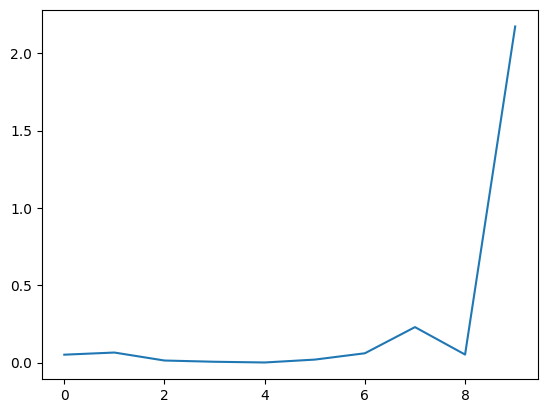

In [25]:
cook_distances = []

for i in range(10):
    cook_distances.append(cook(x, y, i))

plt.plot(cook_distances)
plt.show()

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...